In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#### Data Generation

In [7]:
observations = 1000

xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
print(xs.shape)
print(zs.shape)

generated_inputs = np.column_stack((xs,zs))
print(generated_inputs[:2])

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro',inputs=generated_inputs, targets=generated_targets)

(1000, 1)
(1000, 1)
[[ 8.54278741 -5.13819765]
 [ 1.71354185  1.08398181]]


#### Solving with TensorFlow

In [8]:
training_data = np.load('TF_intro.npz')

In [10]:
input_size = 2
output_size = 1

# model
'''
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)  
                            ])
'''
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                    kernel_initializer =tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                                                    bias_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1)
                            )  
                            ])
# object function = loss, optimization

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
#model.compile(optimizer ='sgd',loss='mean_squared_error')    # sgd => Stochastic Gradient Descent

model.compile(optimizer =custom_optimizer,loss='mean_squared_error')
# fitting the model to data
model.fit(training_data['inputs'],training_data['targets'],epochs=100,verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 36.9730
Epoch 2/100
1000/1000 - 0s - loss: 4.4944
Epoch 3/100
1000/1000 - 0s - loss: 1.4651
Epoch 4/100
1000/1000 - 0s - loss: 0.6319
Epoch 5/100
1000/1000 - 0s - loss: 0.4052
Epoch 6/100
1000/1000 - 0s - loss: 0.3482
Epoch 7/100
1000/1000 - 0s - loss: 0.3312
Epoch 8/100
1000/1000 - 0s - loss: 0.3248
Epoch 9/100
1000/1000 - 0s - loss: 0.3256
Epoch 10/100
1000/1000 - 0s - loss: 0.3303
Epoch 11/100
1000/1000 - 0s - loss: 0.3314
Epoch 12/100
1000/1000 - 0s - loss: 0.3285
Epoch 13/100
1000/1000 - 0s - loss: 0.3314
Epoch 14/100
1000/1000 - 0s - loss: 0.3269
Epoch 15/100
1000/1000 - 0s - loss: 0.3253
Epoch 16/100
1000/1000 - 0s - loss: 0.3246
Epoch 17/100
1000/1000 - 0s - loss: 0.3284
Epoch 18/100
1000/1000 - 0s - loss: 0.3275
Epoch 19/100
1000/1000 - 0s - loss: 0.3241
Epoch 20/100
1000/1000 - 0s - loss: 0.3206
Epoch 21/100
1000/1000 - 0s - loss: 0.3244
Epoch 22/100
1000/1000 - 0s - loss: 0.3258
Epoch 23/100
1000/1000 - 0s - loss: 0.32

output = np.dot(inputs,weights) + bias
* `tf.keras.layers.Dense(output size)` takes the inputs provided to the model and calculates the dot product of the inputs and the weights and adds the bias -> also applies activation function(optional)
* `model.compile(optimizer,loss)` configures the model for training -> l2-norm loss = Least sum of squares(least sum of squared error)
* `Epoch` = iteration over the full dataset
* `verbose` = 0(stands for 'silent' or no output about the training is displayed), 1(for 'progress bar'), 2 (for 'one line per epoch')


#### Extract the weights and bias

In [11]:
model.layers[0].get_weights()

[array([[ 2.010927],
        [-3.010079]], dtype=float32), array([5.025191], dtype=float32)]

In [13]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]
print(f"Predicted weights = {weights[0]},{weights[1]}")
print("Predicted bias = ",bias)

Predicted weights = [2.010927],[-3.010079]
Predicted bias =  [5.025191]


#### Extract the outputs (make predictions)

In [23]:
predicted_values =model.predict_on_batch(training_data['inputs']).round(1)
predicted_values[:5]

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'round'

In [19]:
predicted_values = np.array(model.predict_on_batch(training_data['inputs']))
predicted_values.round(1)[:5]

array([[ 37.7],
       [  5.2],
       [ 26.2],
       [-14. ],
       [ 16.7]], dtype=float32)

In [21]:
# targets/ original
training_data['targets'].round(1)[:5]

array([[ 38.1],
       [  5.1],
       [ 25.6],
       [-14.8],
       [ 17.4]])

#### PLotting the data

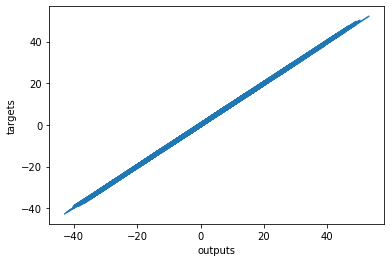

In [24]:

plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()